In [ ]:
pip install visualkeras

     |████████████████████████████████| 992 kB 3.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

In [ ]:
data=tf.keras.datasets.cifar10.load_data() 

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = data
classes = np.unique(y_train)
classes_num = len(classes)

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)
print(classes_num)

10


In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

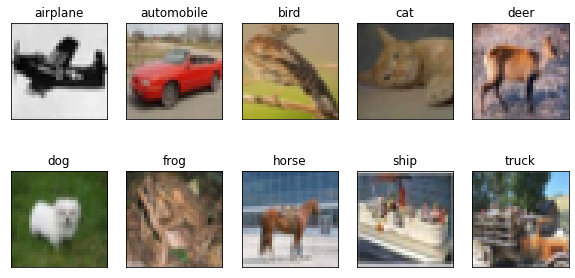

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(10,5))
for i in range(classes_num):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [ ]:
#### Converting the target variables to categorical:
y_train = tf.keras.utils.to_categorical(y_train, classes_num)
y_test = tf.keras.utils.to_categorical(y_test, classes_num)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classes_num))
model.add(Activation('softmax'))

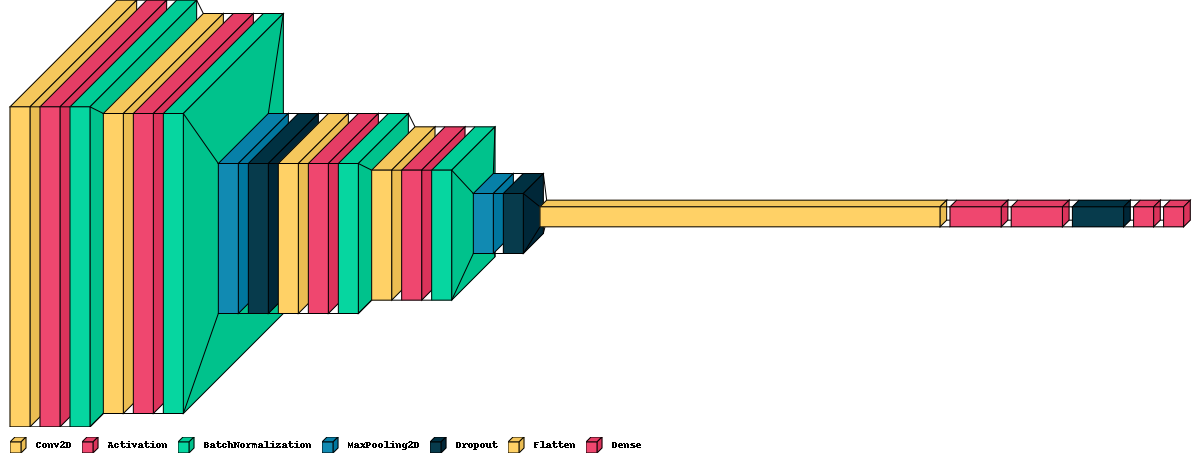

In [ ]:
import visualkeras
visualkeras.layered_view(model, scale_xy=10, legend=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
history = model.fit(x_train, y_train,
              batch_size=32,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 22s 8ms/step - loss: 8.5199 - accuracy: 0.4254 - val_loss: 6.2126 - val_accuracy: 0.5583
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 4.9588 - accuracy: 0.5621 - val_loss: 3.8023 - val_accuracy: 0.6143
Epoch 3/50
1563/1563 [==============================] - 12s 7ms/step - loss: 3.0843 - accuracy: 0.6414 - val_loss: 2.5538 - val_accuracy: 0.6398
Epoch 4/50
1563/1563 [==============================] - 12s 7ms/step - loss: 2.0772 - accuracy: 0.6877 - val_loss: 1.7812 - val_accuracy: 0.6940
Epoch 5/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5296 - accuracy: 0.7208 - val_loss: 1.4435 - val_accuracy: 0.6975
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2237 - accuracy: 0.7426 - val_loss: 1.1722 - val_accuracy: 0.7413
Epoch 7/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0574 - accuracy: 0.7603 - val_loss: 1.0847 - val_ac

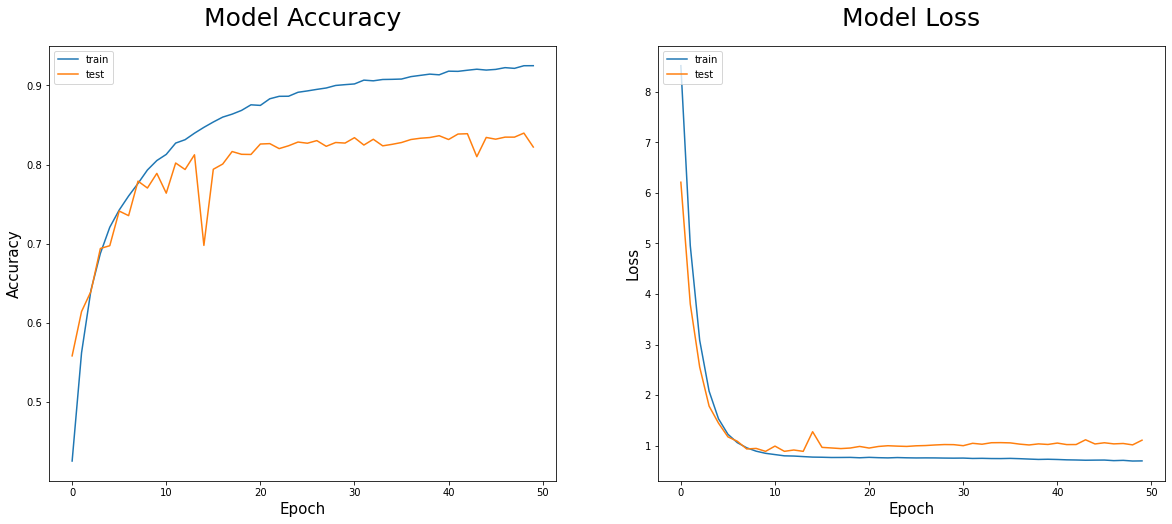

In [ ]:
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

